In [11]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import datetime
import os
import sys
import pandas as pd
import time
sys.path.append('../..')

from src.model.two_steps.model import KNN, WeatherGenerator
from src.validation.validation import loss
import pickle
from experiments.real.config import * 
from tqdm import tqdm
import numpy as np
import pandas as pd
from tqdm import tqdm
import datetime
import os
import sys
import pandas as pd
import time
sys.path.append('../..')

from src.model.two_steps.model import KNN, WeatherGenerator
from src.validation.validation import loss
import pickle
from experiments.real.config import * 
from tqdm import tqdm
from scipy.stats import wilcoxon
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

date = '2016-03-21'

alpha = 0.05

In [12]:
results_dir = os.path.join('..', '..', 'data', 'real', 'results_4years')

In [13]:
src_ids = [
    dir_name for dir_name in sorted(os.listdir(results_dir), reverse=True)
    if dir_name.isdigit() and os.path.exists(os.path.join(results_dir, dir_name, 'metrics_test.pickle'))
    ]
src_ids.sort()

In [14]:
########################################################################
# %% executando
########################################################################
results  = {}
for src_id in tqdm(src_ids):
    try:
        with open(os.path.join(results_dir, str(src_id), "weather_pert_hpt_best.pickle"), 'rb') as file:
            weather_pert_hpt_best = pickle.load(file)
        results[src_id] = weather_pert_hpt_best
    except Exception as e:
        print(e)
        continue

100%|██████████| 68/68 [00:00<00:00, 19345.63it/s]


In [15]:
hpt = pd.DataFrame([{'src_id': src_id, **loss['right-tail']} for src_id, loss in results.items()])
hpt.head()

,src_id,alpha,smoothing,mc,cossine
0,1023,1.00,3,True,True
1,1039,0.85,7,True,True
2,105,0.95,7,True,True
3,1074,0.90,3,False,True
4,1076,0.85,3,True,False


In [16]:
hpt = hpt.sort_values(['src_id', 'alpha', 'smoothing', 'mc', 'cossine'])

In [17]:
col_order  = {col: i+1 for i, col in enumerate(['alpha', 'smoothing', 'cossine', 'mc'])}

fig = make_subplots(rows=len(col_order), cols=len(col_order), shared_xaxes=True, shared_yaxes=True)

for col, i in col_order.items():
    order = [str(i) for i in sorted(hpt[col].unique())]
    print(order)
    hpt[col] = hpt[col].astype(str)
    fig_ = (
            hpt.groupby([col]).agg(count = ('src_id', 'count')).reset_index().sort_values(col)
            .pipe(lambda df: (
                go.Bar(
                    x=df[col], y=df['count'],
                    marker=dict(color='rgba(32,120,180, 1)'),
                    texttemplate= "%{y}",
                    showlegend=False
            )))
    )
    fig_.update(showlegend=False)
    fig.add_trace(fig_, row=i, col=i)
    if col == 'smoothing':
        fig.update_xaxes(categoryorder='array', categoryarray=order, row=i, col=i)

for col_x, col_i in col_order.items():
    for col_y, row_i in col_order.items():
        if row_i <= col_i:
            continue
        fig_ = go.Histogram2d(
                x=hpt[col_x], 
                y=hpt[col_y],
                colorscale='Blues',
                texttemplate= "%{z}",
                showlegend=False,
                legendwidth=0
            )
        fig_.update(showlegend=False)
        fig.add_trace(fig_, row=row_i, col=col_i)

fig.update_layout(
    template = "simple_white",
    width=800, height=800,
    margin=dict(l=0, t=50)
    )
fig.update_layout(showlegend=False)
for col, i in col_order.items():
    fig.update_xaxes(title_text=col, row=len(col_order), col=i)
    fig.update_yaxes(title_text=col, row=i, col=1)
fig.write_image('real_hpt.pdf')

['0.85', '0.9', '0.95', '1.0']
['0', '3', '7', '14']
['False', 'True']
['False', 'True']


In [9]:
for src_id, hpt in results.items():
    row = f"{src_id}"
    for loss_type in ['right-tail', 'pinball', 'density', ]:
        for param in ['alpha', 'smoothing', 'mc', 'cossine']:
            row += f" &  {hpt[loss_type][param]}"
    row += ' \\\\'
    print(row)
            

1023 &  1.0 &  3 &  True &  True &  1.0 &  3 &  True &  True &  0.85 &  14 &  False &  False \\
1039 &  0.85 &  7 &  True &  True &  0.9 &  14 &  True &  False &  0.85 &  7 &  False &  False \\
105 &  0.95 &  7 &  True &  True &  0.95 &  7 &  True &  True &  0.95 &  14 &  False &  True \\
1074 &  0.9 &  3 &  False &  True &  0.95 &  3 &  True &  False &  0.85 &  0 &  False &  False \\
1076 &  0.85 &  3 &  True &  False &  0.9 &  7 &  True &  True &  0.85 &  3 &  False &  True \\
1090 &  1.0 &  14 &  False &  False &  1.0 &  3 &  False &  False &  1.0 &  7 &  False &  False \\
1145 &  1.0 &  7 &  True &  True &  1.0 &  7 &  True &  True &  1.0 &  0 &  False &  False \\
1161 &  1.0 &  7 &  True &  False &  1.0 &  7 &  True &  False &  1.0 &  0 &  False &  True \\
1171 &  0.95 &  14 &  True &  False &  0.95 &  3 &  True &  True &  0.85 &  7 &  False &  False \\
1180 &  0.9 &  3 &  False &  False &  0.85 &  14 &  False &  False &  0.9 &  0 &  False &  False \\
1190 &  1.0 &  14 &  True &  

In [16]:
col = 'smoothing'
fig_ = (
            hpt.groupby([col]).agg(count = ('src_id', 'count')).reset_index().sort_values(col)
            .pipe(lambda df: (
                go.Bar(
                    x=df[col], y=df['count'],
                    marker=dict(color='rgba(32,120,180, 1)'),
                    texttemplate= "%{y}",
                    showlegend=False,
            )))
    )
fig_.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['0','3','7','14']})
fig = go.Figure(fig_)
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':['0','3','7','14']})
fig

AttributeError: 'Bar' object has no attribute 'update_layout'

# Rascunho

In [29]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np  
import time
import os
import pickle
import sys
import time
from itertools import product
from numpy import nan

sys.path.append('../..')
from src.model.true import check_duration
from experiments.real.config import *
from tqdm import tqdm
tasks = list(project_schedule.keys())

from joblib import Parallel, delayed
import numpy as np
import pandas as pd
from tqdm import tqdm
import datetime
import os
import sys
import time
sys.path.append('../..')
from src.model.weather_pert import WeatherPert
from src.model.two_steps.model import KNN, WeatherGenerator
from src.validation.validation import *
from experiments.real.config import * 
import pickle
from experiments.real.config import * 
from tqdm import tqdm

In [31]:
date_train_start = datetime.date(2017, 1, 1)
date_train_end = datetime.date(2017, 12, 31)
date_train = [(date_train_start+datetime.timedelta(days=x)).isoformat() for x in range(0, (date_train_end-date_train_start).days+1, 7)]
print('date_train', date_train)

date_train ['2017-01-01', '2017-01-08', '2017-01-15', '2017-01-22', '2017-01-29', '2017-02-05', '2017-02-12', '2017-02-19', '2017-02-26', '2017-03-05', '2017-03-12', '2017-03-19', '2017-03-26', '2017-04-02', '2017-04-09', '2017-04-16', '2017-04-23', '2017-04-30', '2017-05-07', '2017-05-14', '2017-05-21', '2017-05-28', '2017-06-04', '2017-06-11', '2017-06-18', '2017-06-25', '2017-07-02', '2017-07-09', '2017-07-16', '2017-07-23', '2017-07-30', '2017-08-06', '2017-08-13', '2017-08-20', '2017-08-27', '2017-09-03', '2017-09-10', '2017-09-17', '2017-09-24', '2017-10-01', '2017-10-08', '2017-10-15', '2017-10-22', '2017-10-29', '2017-11-05', '2017-11-12', '2017-11-19', '2017-11-26', '2017-12-03', '2017-12-10', '2017-12-17', '2017-12-24', '2017-12-31']


In [33]:
results_dir = os.path.join('..', '..', 'data', 'real', 'results_2018')
src_dir = src_dir = os.path.join(results_dir, str(src_id))
with open(os.path.join(src_dir, 'observed.pickle'), 'rb') as file:
    observed = pickle.load(file)
observed_train = {k: v for k, v in observed.items() if k in date_train}

In [56]:
model = WeatherPert(**{'alpha': 1.0, 'smoothing': 7, 'mc': True, 'cossine': False}, column_date=date_column)

In [57]:
data = pd.read_csv(os.path.join(data_dir, f"{src_id}.csv")).fillna(nan).replace([None], [nan])
data_train = data[data[date_column] < date]
model.fit(data=data_train,tasks_conditions=tasks_conditions)

In [59]:
hpt

,src_id,alpha,smoothing,mc,cossine
0,1033,0.85,7,True,True
1,105,0.85,7,True,True
2,1055,0.85,14,True,False
3,113,0.95,14,False,False
4,1137,1.00,3,True,False
...,...,...,...,...,...
60,888,0.85,0,False,True
61,889,0.85,3,False,True
62,9,1.00,3,True,True
63,908,1.00,14,True,False


earthworks_1


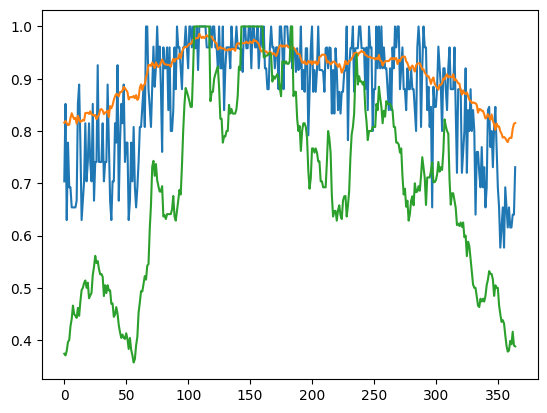

concrete_1


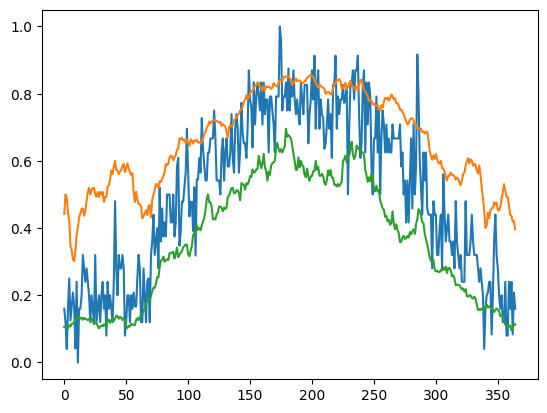

formworks_1


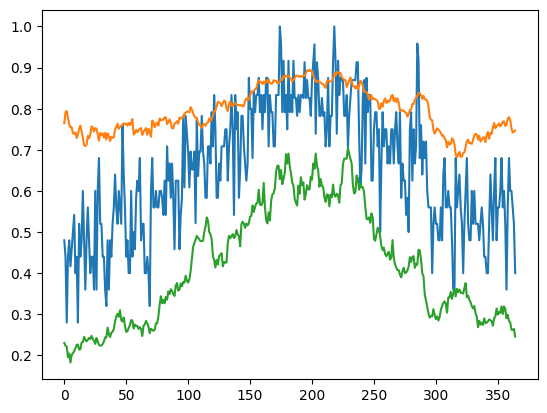

steelworks_1


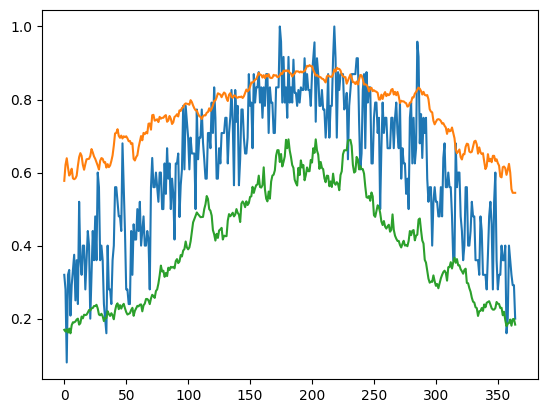

outdoor_1


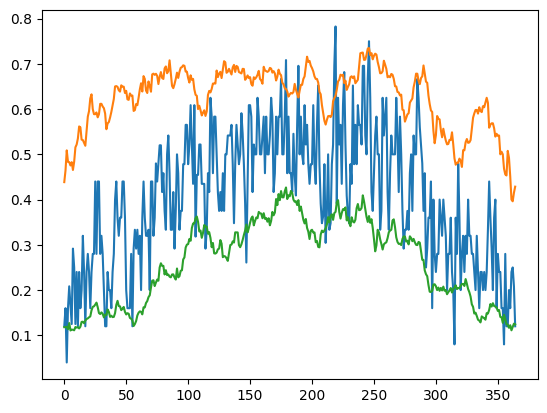

pavements_1


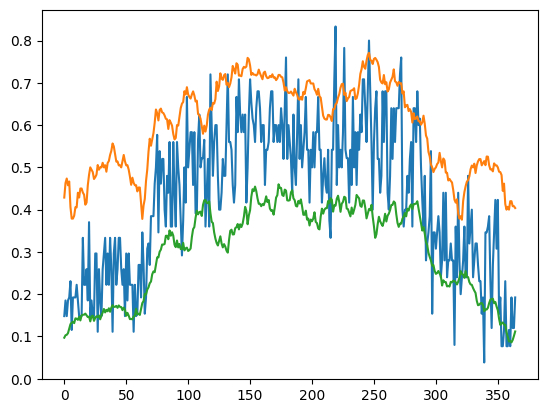

earthworks_2


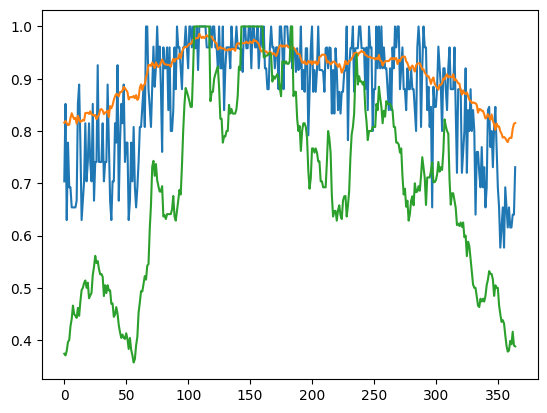

concrete_2


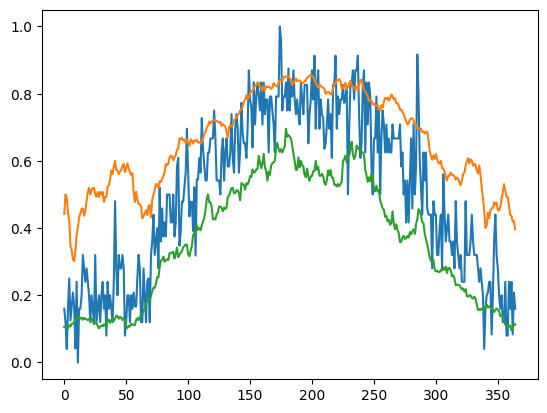

formworks_2


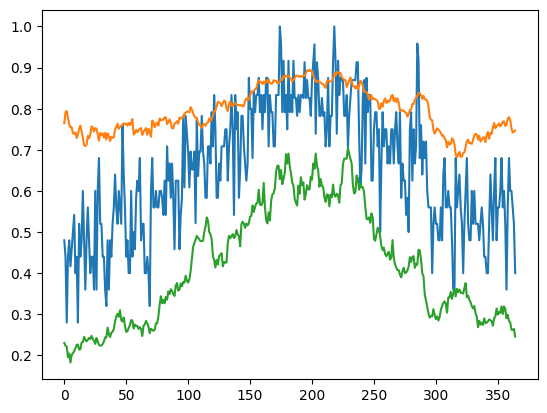

steelworks_2


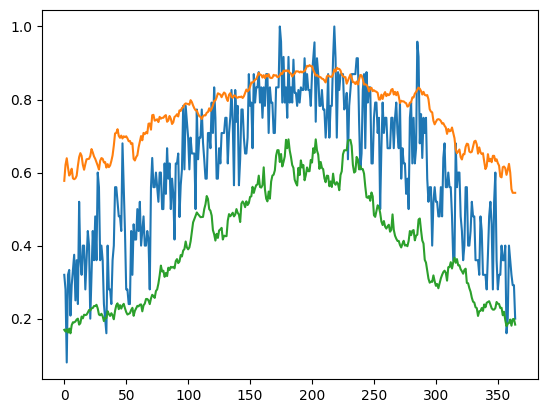

outdoor_2


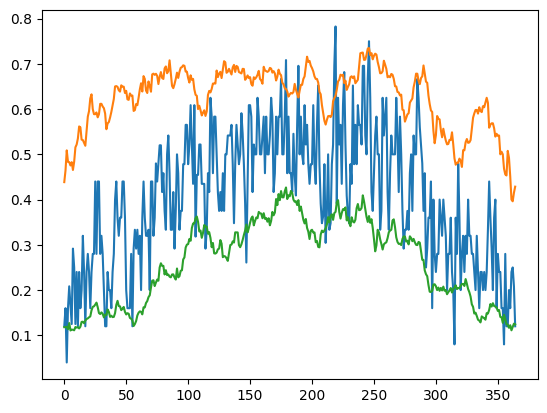

pavements_2


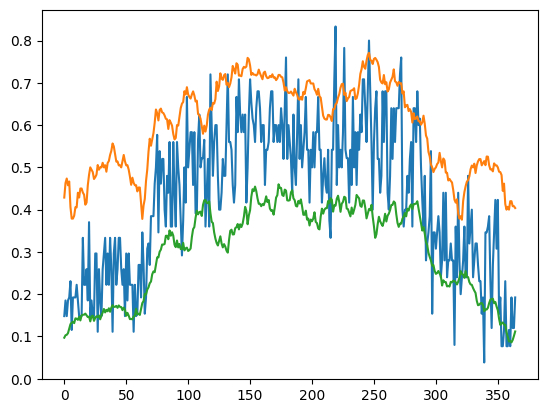

In [58]:
import  matplotlib.pyplot as plt
for task, thetas in model.theta.items():
    print(task)
    plt.plot(list(range(len(thetas[-1]))), thetas[-1])
    plt.plot(list(range(len(thetas[1]))), thetas[1])
    plt.plot(list(range(len(thetas[0]))), thetas[0])
    plt.show()

earthworks_1


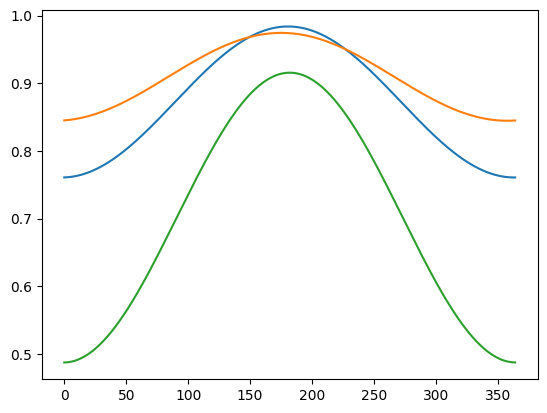

concrete_1


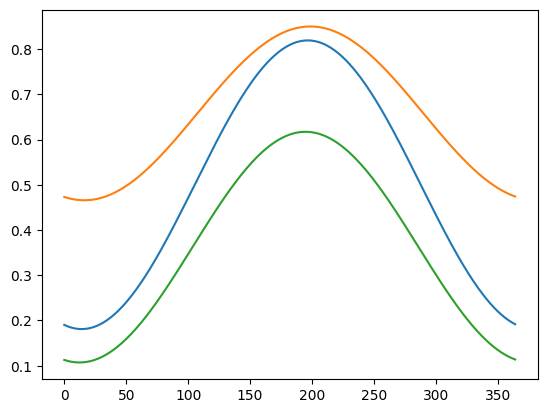

formworks_1


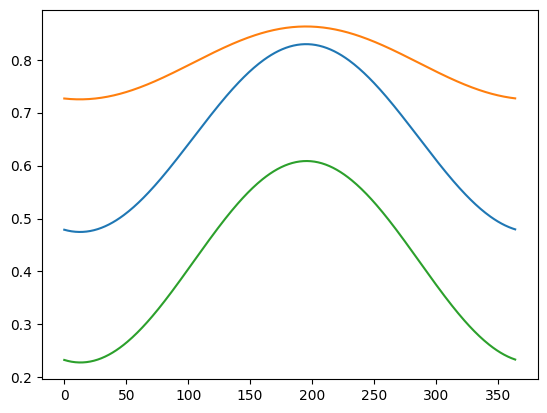

steelworks_1


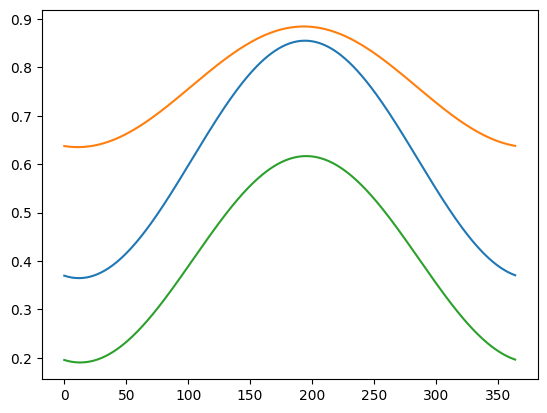

outdoor_1


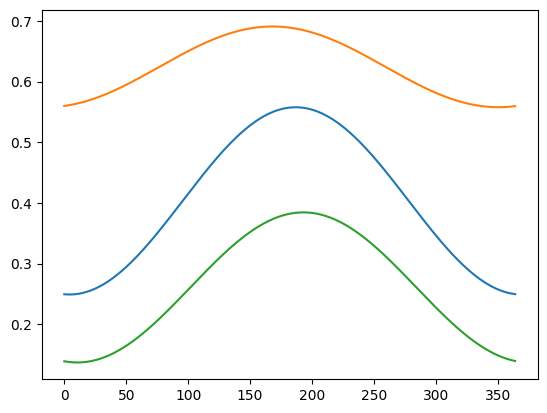

pavements_1


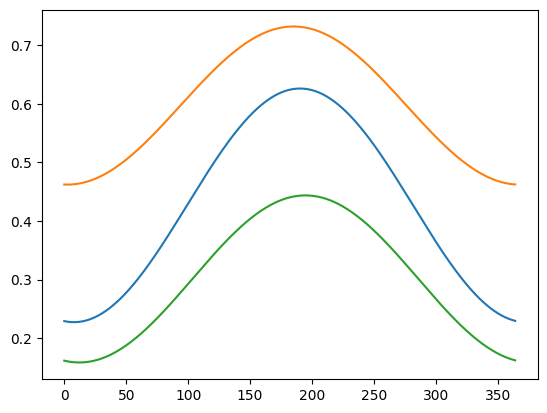

earthworks_2


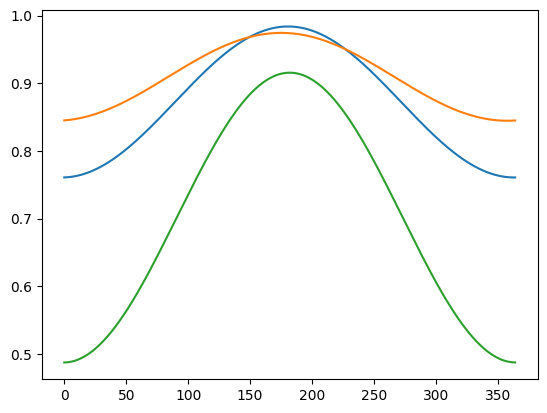

concrete_2


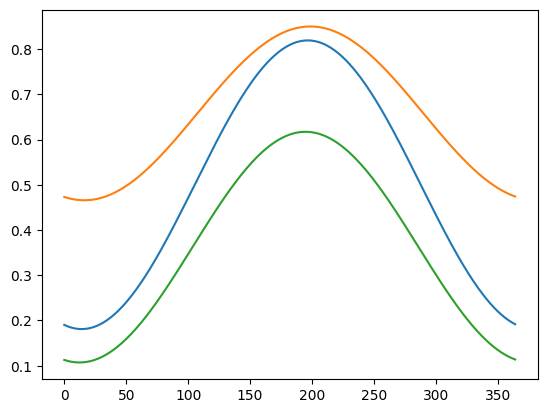

formworks_2


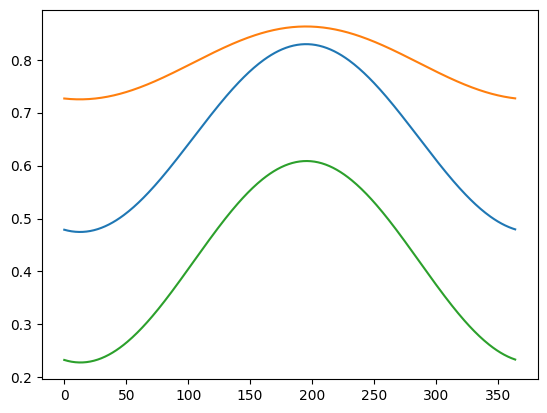

steelworks_2


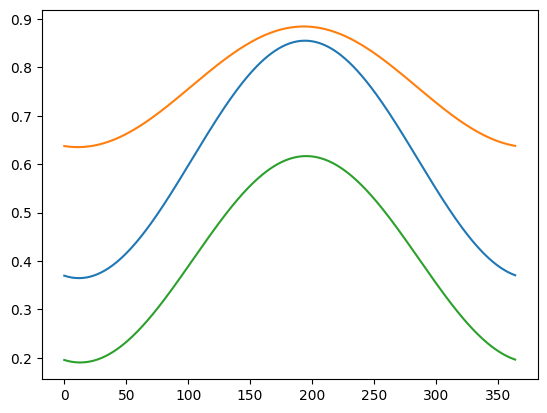

outdoor_2


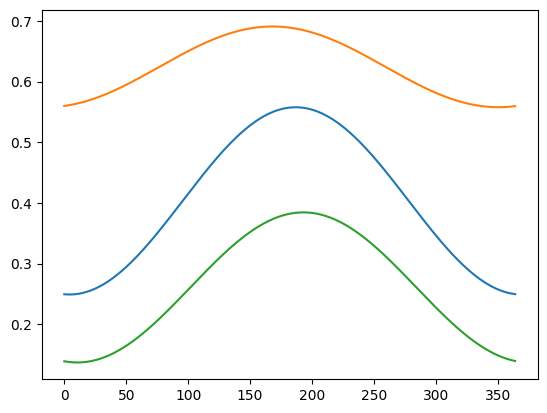

pavements_2


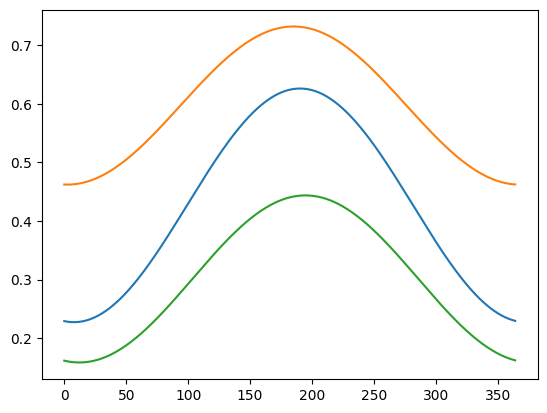

In [48]:
import  matplotlib.pyplot as plt
for task, thetas in model.theta.items():
    print(task)
    plt.plot(list(range(len(thetas[-1]))), thetas[-1])
    plt.plot(list(range(len(thetas[1]))), thetas[1])
    plt.plot(list(range(len(thetas[0]))), thetas[0])
    plt.show()

In [ ]:
for date, real_duration in tqdm(observed_train.items()):
    # filter data before date_start
    model = WeatherPert(**weather_pert_params, column_date=date_column)
    
    model.fit(
        data=data_train,
        tasks_conditions=tasks_conditions)
        
    backup_weather_pert_hpt = []
    backup_simulation = []
    for exp in weather_pert_hpt_exps_backup:
        if exp['date'] != date:
            continue
        backup_simulation.append(exp['estimate'])
        backup_weather_pert_hpt.append(exp['args'])
    print("LEN backup_weather_pert_hpt", len(backup_weather_pert_hpt))
    new_weather_pert_hpt = [
        args for args in weather_pert_hpt
        if args not in backup_weather_pert_hpt]
    print("LEN new_weather_pert_hpt", len(new_weather_pert_hpt))
    #if len(new_weather_pert_hpt) == len(weather_pert_hpt):
    #    raise ValueError
    data_train = data[data[date_column] < date]
    # exec simulation
    #import time
    #start = time.time()
    new_simulation = (
        Parallel(n_jobs=-1, prefer="processes")
        (delayed(sim_hpt)(
            args=args, data=data_train, date_start=date, B=B,
            tasks_conditions=tasks_conditions,
            project_schedule=project_schedule
            )
        for args in new_weather_pert_hpt
        ))

In [34]:
with open(os.path.join(results_dir, str(1033), "weather_pert_hpt_best.pickle"), 'rb') as file:
    weather_pert_hpt_best = pickle.load(file)
weather_pert_hpt_best

{'density': {'alpha': 0.85, 'smoothing': 0, 'mc': False, 'cossine': False},
 'two-tailed': {'alpha': 0.85, 'smoothing': 3, 'mc': True, 'cossine': True},
 'left-tail': {'alpha': 0.85, 'smoothing': 3, 'mc': True, 'cossine': True},
 'right-tail': {'alpha': 0.85, 'smoothing': 7, 'mc': True, 'cossine': True},
 'centered': {'alpha': 0.85, 'smoothing': 3, 'mc': True, 'cossine': True},
 'pinball': {'alpha': 0.85, 'smoothing': 3, 'mc': True, 'cossine': True},
 'mse': {'alpha': 0.85, 'smoothing': 7, 'mc': True, 'cossine': True}}

In [9]:
hpt = pd.DataFrame([{'src_id': src_id, **loss['right-tail']} for src_id, loss in results.items()])
hpt.head()

,src_id,alpha,smoothing,mc,cossine
0,1033,0.85,7,True,True
1,105,0.85,7,True,True
2,1055,0.85,14,True,False
3,113,0.95,14,False,False
4,1137,1.00,3,True,False


In [10]:
hpt.groupby(['alpha', 'smoothing', 'mc', 'cossine']).agg(count=('src_id', 'count')).reset_index()#.to_csv('test.csv', index=False)

,alpha,smoothing,mc,cossine,count
0,0.85,0,False,True,1
1,0.85,3,False,True,1
2,0.85,3,True,False,1
3,0.85,3,True,True,4
4,0.85,7,True,True,5
5,0.85,14,False,True,1
6,0.85,14,True,False,6
7,0.85,14,True,True,2
8,0.90,3,True,False,1
9,0.90,7,True,True,3
